<h1>Exploiting Genetic Algorithms for Optimisation </h1>
<br>

<h2> The problem</h2>
We need to make cylindrical containers with fixed volume 30 cubic cm so that, given the diameter you can figure out its height, minimizing the building material. 
This mathematically simple minimization problem could be solved with a genetic algorithm driven by the diameter (or radius) that must always be positive. The rest of the problem definition is up to you. 

In [237]:
# Install dependencies
import math
import numpy as np
import time

## Defining the Problem

We need to optimise the building material of Cilinders of Volume 30
$$ 
\begin{equation}
    Volume = \pi r^2 h = 30
\end{equation}
$$

In [238]:

#1. Initial Hyperparameters
np.random.seed(2023)

#2. Define height given diameter
def height (d):
    r = d/2
    pi = math.pi
    #volume = pi * (r**2) * h
    h = 30/(pi*(r**2))
    return h

#3. Define Fitness
def fitness (r):
    #r=d/2
    return 1/(2 * (math.pi) * (r**2) * (60/r))
    
#3. Define selection methods
def ranked_fitness (current_generation, max_radius, n):
    ranked_solutions = []
    for el in current_generation:
        ranked_solutions.append((fitness(decode_r(el, max_radius, n)),decode_r(el, max_radius, n)))#added a second element to keep track of solutions and not only fitness
    ranked_solutions.sort()
    ranked_solutions.reverse()
    return ranked_solutions

#4. Define reproduction method
def random_choice (generation):
    choice = np.random.randint(0,len(generation)-1)
    return generation[choice]

def ranked_choice (generation, max_radius, n):
    #wheel selection
    #create list with radius and its fitness
    gen_fit=[]
    for el in generation:
        gen_fit.append((fitness(decode_r(el, max_radius, n)),el))           
    # computes the total the generation fitness
    generation_fitness = sum([el[0] for el in gen_fit])
    # computes the probability for each radius
    probabilities = [el[0]/generation_fitness for el in gen_fit]
    # selects one chromosome based on the computed probabilities
    choice= gen_fit[np.random.choice(np.arange(len(gen_fit)), p=probabilities)]

    return choice[1]


    
def crossover(parentA, parentB):
    cross_point = np.random.randint(len(parentA))
    child = parentA[:cross_point]+parentB[cross_point:]
    return child

def reproduction (current_gen, max_radius, n):
    new_generation = []
    for i in range(len(current_gen)):
        parentA = ranked_choice(current_gen, max_radius, n)
        parentB = ranked_choice(current_gen, max_radius, n)
        child = crossover(parentA, parentB)
        if '1' in child:
            new_generation.append(child)
        else:
            new_generation.append(parentA)
    return new_generation

def random_reproduction (current_gen):
    new_generation = []
    for i in range(len(current_gen)):
        parentA = random_choice(current_gen)
        parentB = random_choice(current_gen)
        child = crossover(parentA, parentB)
        if '1' in child:
            new_generation.append(child)
        else:
            new_generation.append(parentA)
    return new_generation

        
#Function to decode binary radius
def decode_r(r, max_radius, n):
    rad=list(map(int, str(r)))
    dec_r=(max_radius/(2**n-1))*sum(rad[i]*2**i for i in range(len(rad)))
    return dec_r





In [239]:

#4. Start with generation zero
#elements = []
#for i in range(pop_size):
#    x=30*np.random.rand()
#    if x!=0:
#        elements.append(x) 
#
#print(elements[:5])

#5. Encode population
#r: (0,30]


#I think it's better to generate an already binary encoded population and then decode it

#Generation zero binary
def first_gen(pop_size,n):
    gen_zero=[]
    for i in range(pop_size):
        x = []
        while 1 not in x:
            x = [np.random.choice([0, 1]) for _ in range(n)]

        
        el = ''.join(map(str, x))
        gen_zero.append(el)

    return gen_zero

#r=decode_r(elements[3])
#print(r)


In [240]:
#5. New generation iterations
def digi_evolve(pop_size, max_generations, max_radius, n):
    #create temporary vars
    fittest = []
    curr_generation = first_gen(pop_size, n) #initialising first gen
    #GA begins
    print('Evolutionary period begins')
    for i in range(max_generations):
        if i % 10 == 0:
            print(f'Generation {i} is going into the world')
            print(f'Population size {len(curr_generation)}')
        ranked_fit = ranked_fitness(curr_generation, max_radius, n)
        fittest.append(ranked_fit[0])
        #reproduction
        curr_generation = reproduction(curr_generation, max_radius, n)
    print('Evolutionary period begins')
    return fittest    


def random_digi_evolve(pop_size, max_generations, max_radius, n):
    #create temporary vars
    fittest = []
    curr_generation = first_gen(pop_size, n) #initialising first gen
    #GA begins
    print('Evolutionary period begins')
    for i in range(max_generations):
        if i % 10 == 0:
            print(f'Generation {i} is going into the world')
            print(f'Population size {len(curr_generation)}')
        ranked_fit = ranked_fitness(curr_generation, max_radius, n)
        fittest.append(ranked_fit[0])
        #reproduction
        curr_generation = random_reproduction(curr_generation)
    print('Evolutionary period begins')
    return fittest  


In [241]:
pop_size = 100
max_generations = 1000
n=8 #step:0.1176 if we work in range [0,30]
max_radius=30

start = time.time()

best_of_each_gen = digi_evolve(pop_size, max_generations, max_radius, n)

end = time.time()
print('time in seconds to complete:',end - start)

print('The best radius is:', max(best_of_each_gen))

#do we want to add mutations too?


Evolutionary period begins
Generation 0 is going into the world
Population size 11
Evolutionary period begins
time in seconds to complete: 0.025141477584838867
The best radius is: (0.01127347513567592, 0.23529411764705882)


In [242]:
#Compare it with random choice

start = time.time()

rand_best_of_each_gen = random_digi_evolve(pop_size, max_generations, max_radius, n)

end = time.time()
print('time in seconds to complete:',end - start)
print('The best radius is:', max(best_of_each_gen))
print('The best radius with random choice is:', max(rand_best_of_each_gen))
#The best radius is: (0.02254695027135184, 0.11764705882352941)
#The best radius with random choice is: (0.02254695027135184, 0.11764705882352941)
#with pop_size=100 we obtain the same solution with both!!!!

#TESTS:
#only decreasing the pop_size you can actally see a difference
#if you only modify the max_generations you get the same result with both methods
#wheel selection might not be the best choice in this case because all the radiuses have pretty similar fitness values



Evolutionary period begins
Generation 0 is going into the world
Population size 11
Evolutionary period begins
time in seconds to complete: 0.004453897476196289
The best radius is: (0.01127347513567592, 0.23529411764705882)
The best radius with random choice is: (0.0006832409173136921, 3.8823529411764706)


In [243]:
#Testing with different n


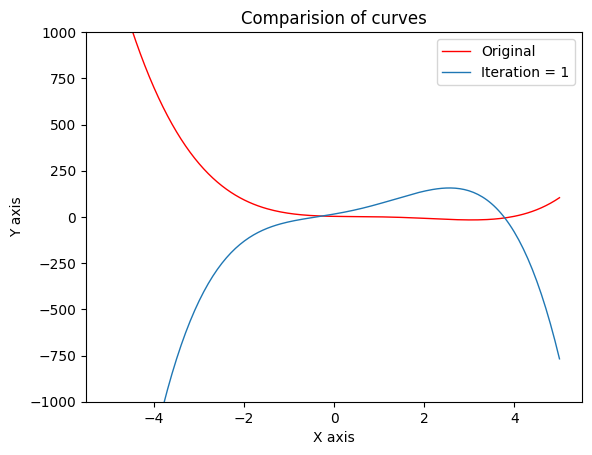

KeyboardInterrupt: 

In [244]:
"""
Genetic Algorithm implementation of finding coefficients of a polynomial
3.0 - 4.3 * x + 5.9 * x ** 2 - 5.2 * x ** 3 + 1.0 * x ** 4 = 0
"""

#%% import modules
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

# np.set_printoptions(linewidth=np.inf)


#%% define a function to return the polynomial
def poly(x):
    return 3.0 - 4.3 * x + 5.9 * x ** 2 - 5.2 * x ** 3 + 1.0 * x ** 4


def gen_poly(array, x):
    return (
        array[0]
        + array[1] * x
        + array[2] * x ** 2
        + array[3] * x ** 3
        + array[4] * x ** 4
    )


#%% define function to measure fitness
### takes an array as input and fills the last column with fitness values
### take care to always keep one column for fitness values in starting array
### output is an array sorted by fitness
def fitness(array):
    # set initial values
    initial = np.array(
        [
            [-5, 1447.0],
            [-4, 703.4],
            [-3, 290.4],
            [-2, 92.8],
            [-1, 19.4],
            [0, 3],
            [1, 0.4],
            [2, -7.6],
            [3, -16.2],
            [4, 3.4],
            [5, 104],
        ]
    )
    # score is the total square deviation from initial. lower is better
    for ind in array:
        fitness = 0
        for x, y in zip(initial[:, 0], initial[:, 1]):
            fitness += (
                (
                    ind[0]
                    + ind[1] * x
                    + ind[2] * x ** 2
                    + ind[3] * x ** 3
                    + ind[4] * x ** 4
                )
                - y
            ) ** 2
        ind[5] = fitness
    return array[array[:, 5].argsort()]


#%% function to give non linear rank to sorted pool
def nl_rank(array):
    copy = deepcopy(array)
    # normalization factor for selection pressure 3 and individuals 50
    norm = 290.3359045831912
    # setting ranks based on position in the pool
    for i, j in enumerate(copy):
        j[-1] = 50 * 1.06 ** (49 - i) / norm
    return copy


#%% define function to carry out stochastic universal sampling
### takes non linear ranked array as input
### output is list of selected individuals
def sel_ind(nl_array):
    copy = deepcopy(nl_array)
    # normalize ranks
    norm = sum(copy[:, -1])
    copy[:, -1] = copy[:, -1] / norm

    # map intervals on range [0, 1]
    prob_list = list(copy[:, -1])
    intervals = []
    start = 0
    for prob in prob_list:
        end = start + prob
        intervals.append((start, end))
        start = end

    # selecting 6 individuals from the intervals
    rng = np.random.default_rng()
    points = [rng.uniform(0, 1 / 5)]
    for i in range(4):
        points.append(points[-1] + 1 / 5)
    index, i = [], 0
    for point in points:
        for j in range(i, len(intervals)):
            if intervals[j][0] < point < intervals[j][1]:
                index.append(j)
                i = j
                break
    return index


#%% define function to carry out mating. only unique pairings are considered
### each mating gives 2 children
def crossover(array, individuals):
    rng = np.random.default_rng()
    progeny = np.empty((0, 6))
    for i in range(len(individuals) - 1):
        for j in range(i + 1, len(individuals)):
            mate1 = rng.uniform(-0.25, 1.25, [1, 5]).squeeze()
            mate2 = rng.uniform(-0.25, 1.25, [1, 5]).squeeze()
            mutation1 = rng.uniform(-0.025, 0.025, [1, 5]).squeeze()
            mutation2 = rng.uniform(-0.025, 0.025, [1, 5]).squeeze()
            baby1 = (
                array[i, :5] * mate1 + array[j, :5] * (1 - mate1) + mutation1 * mate1
            )
            baby1 = np.append(baby1, 0)
            progeny = np.append(progeny, [baby1], axis=0)
            baby2 = (
                array[j, :5] * mate2 + array[i, :5] * (1 - mate2) + mutation2 * mate2
            )
            baby2 = np.append(baby2, 0)
            progeny = np.append(progeny, [baby2], axis=0)
    return fitness(progeny)


#%% helper function to print arrays to log
def arr_print(arr, count):
    print(f"#loop_count = {count}")
    print(arr)


#%% main
if __name__ == "__main__":
    # create rng instance
    rng = np.random.default_rng()

    # create parent pool
    # parent pool has 5 columns for coefficients and one for fitness
    pool = rng.uniform(-50, 50, [50, 6])

    # measure fitness of each parent and sort in decreasing order of fitness
    pool = fitness(pool)
    starting_fitness = pool[0, 5]

    # plotting the original curve
    plt.ion()
    fig, ax = plt.subplots()
    x = np.linspace(-5, 5, 200)
    ax.plot(x, poly(x), "r", lw=1, label="Original")
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_ylim(-1000, 1000)
    ax.set_title("Comparision of curves")
    ax.legend()

    loop_count = 1

    while True:
        # plotting
        if loop_count == 1:
            ax.plot(x, gen_poly(pool[0, :], x), lw=1, label=f"Iteration = {loop_count}")
            ax.legend()
            fig.canvas.draw()
            plt.pause(0.0001)
            # arr_print(pool, loop_count)
        elif loop_count % 100 == 0:
            ax.plot(x, gen_poly(pool[0, :], x), lw=0.25, ls="solid")
            fig.canvas.draw()
            plt.pause(0.0000001)
            # arr_print(pool, loop_count)
        # add termination condition
        elif pool[0, 5] < 0.005:
            ax.plot(
                x,
                gen_poly(pool[0, :], x),
                "k",
                lw=1.5,
                label=f"Iteration = {loop_count}",
            )
            ax.set_xlim(-2, 5)
            ax.set_ylim(-40, 75)
            ax.legend()
            fig.canvas.draw()
            plt.pause(0.001)
            # arr_print(pool, loop_count)
            break
        # rank parents based on non linear ranking
        ranked = nl_rank(pool)

        # select individuals
        individuals = sel_ind(ranked)

        # create progeny
        progeny = crossover(ranked, individuals)

        # remove 20 worst individuals from pool
        pool = np.delete(pool, np.s_[-20:], axis=0)

        # add progeny to the new pool
        pool = np.vstack((pool, progeny[:20, :]))

        # sort pool according to fitness
        pool = pool[pool[:, 5].argsort()]

        loop_count += 1

    print(starting_fitness, pool[0, 5])


In [ ]:
from random import random, sample, choice
from math import floor
from tqdm import tqdm
from numpy import array, dot, mean
from numpy.linalg import pinv
from sys import exit


def generate_data():
    """
    We will generate data with a clear pattern.
    This ensures we have an idea of the desired result.
    This is only for demonstration purposes, real data is needed in practice.
    """
    coeff = [0.4, -0.3, 0.2, -0.1]
    x = [[random() for j in range(len(coeff))] for i in range(1000)]
    y = [dot(i, coeff) for i in x]
    return array(x), array(y)


def multiple_linear_regression(inputs, outputs):
    """
    Get the best expected outcome.
    This is expected to equal the coefficients in generate_data().
    """
    X, Y = array(inputs), array(outputs)
    X_t, Y_t = X.transpose(), Y.transpose()
    coeff = dot((pinv((dot(X_t, X)))), (dot(X_t, Y)))
    Y_p = dot(X, coeff)
    Y_mean = mean(Y)
    SST = array([(i - Y_mean) ** 2 for i in Y]).sum()
    SSR = array([(i - j) ** 2 for i, j in zip(Y, Y_p)]).sum()
    COD = (1 - (SSR / SST)) * 100.0
    av_error = (SSR / len(Y))
    return {'COD': COD, 'coeff': coeff, 'error': av_error}


def check_termination_condition(best_individual):
    """
    Check if the current_best_individual is better of equal to the expected.
    """
    if ((best_individual['COD'] >= 99.0)
            or (generation_count == max_generations)):
        return True
    else:
        return False


def create_individual(individual_size):
    """
    Create an individual.
    """
    return [random() for i in range(individual_size)]


def create_population(individual_size, population_size):
    """
    Create an initial population.
    """
    return [create_individual(individual_size) for i in range(population_size)]


def get_fitness(individual, inputs):
    """
    Calculate the fitness of an individual.
    Return the Coefficient of Determination, average error and weight.
    We use the error to get the best individual.
    """
    predicted_outputs = dot(array(inputs), array(individual))
    output_mean = mean(outputs)
    SST = array(
        [(i - output_mean) ** 2 for i in outputs]).sum()
    SSR = array(
        [(i - j) ** 2 for i, j in zip(outputs, predicted_outputs)]).sum()
    COD = (1 - (SSR / SST)) * 100.0
    av_error = (SSR / len(outputs))
    return {'COD': COD, 'error': av_error, 'coeff': individual}


def evaluate_population(population):
    """
    Evaluate a population of individuals and return the best among them.
    """
    fitness_list = [get_fitness(individual, inputs)
                    for individual in tqdm(population)]
    error_list = sorted(fitness_list, key=lambda i: i['error'])
    best_individuals = error_list[: selection_size]
    best_individuals_stash.append(best_individuals[0]['coeff'])
    print('Error: ', best_individuals[0]['error'],
          'COD: ', best_individuals[0]['COD'])
    return best_individuals


def crossover(parent_1, parent_2):
    """
    Return offspring given two parents.
    Unlike real scenarios, genes in the chromosomes aren't necessarily linked.
    """
    child = {}
    loci = [i for i in range(0, individual_size)]
    loci_1 = sample(loci, floor(0.5*(individual_size)))
    loci_2 = [i for i in loci if i not in loci_1]
    chromosome_1 = [[i, parent_1['coeff'][i]] for i in loci_1]
    chromosome_2 = [[i, parent_2['coeff'][i]] for i in loci_2]
    child.update({key: value for (key, value) in chromosome_1})
    child.update({key: value for (key, value) in chromosome_2})
    return [child[i] for i in loci]


def mutate(individual):
    """
    Mutate an individual.
    The gene transform decides whether we'll add or deduct a random value.
    """
    loci = [i for i in range(0, individual_size)]
    no_of_genes_mutated = floor(probability_of_gene_mutating*individual_size)
    loci_to_mutate = sample(loci, no_of_genes_mutated)
    for locus in loci_to_mutate:
        gene_transform = choice([-1, 1])
        change = gene_transform*random()
        individual[locus] = individual[locus] + change
    return individual


def get_new_generation(selected_individuals):
    """
    Given selected individuals, create a new population by mating them.
    Here we also apply variation operations like mutation and crossover.
    """
    parent_pairs = [sample(selected_individuals, 2)
                    for i in range(population_size)]
    offspring = [crossover(pair[0], pair[1]) for pair in parent_pairs]
    offspring_indices = [i for i in range(population_size)]
    offspring_to_mutate = sample(
        offspring_indices,
        floor(probability_of_individual_mutating*population_size)
    )
    mutated_offspring = [[i, mutate(offspring[i])]
                         for i in offspring_to_mutate]
    for child in mutated_offspring:
        offspring[child[0]] = child[1]
    return offspring

inputs, outputs = generate_data()
individual_size = len(inputs[0])
population_size = 1000
selection_size = floor(0.1*population_size)
max_generations = 50
probability_of_individual_mutating = 0.1
probability_of_gene_mutating = 0.25
best_possible = multiple_linear_regression(inputs, outputs)
best_individuals_stash = [create_individual(individual_size)]
initial_population = create_population(individual_size, 1000)
current_population = initial_population
termination = False
generation_count = 0
while termination is False:
    current_best_individual = get_fitness(best_individuals_stash[-1], inputs)
    print('Generation: ', generation_count)
    best_individuals = evaluate_population(current_population)
    current_population = get_new_generation(best_individuals)
    termination = check_termination_condition(current_best_individual)
    generation_count += 1
else:
    print(get_fitness(best_individuals_stash[-1], inputs))

Generation:  0


100%|██████████| 1000/1000 [00:01<00:00, 715.66it/s]


Error:  0.02948146741628524 COD:  -15.576708929530314
Generation:  1


100%|██████████| 1000/1000 [00:01<00:00, 725.67it/s]


Error:  0.018055929820142633 COD:  29.21502461841836
Generation:  2


100%|██████████| 1000/1000 [00:01<00:00, 668.94it/s]


Error:  0.006584974968491596 COD:  74.18480822222608
Generation:  3


100%|██████████| 1000/1000 [00:04<00:00, 212.95it/s]


Error:  0.003106413851745033 COD:  87.8218718054898
Generation:  4


100%|██████████| 1000/1000 [00:04<00:00, 236.42it/s]


Error:  0.002919360371742366 COD:  88.55518081305236
Generation:  5


100%|██████████| 1000/1000 [00:02<00:00, 391.37it/s]


Error:  0.0024099879426211653 COD:  90.55208239688427
Generation:  6


100%|██████████| 1000/1000 [00:02<00:00, 389.74it/s]


Error:  0.0014764755459169 COD:  94.2117472647327
Generation:  7


100%|██████████| 1000/1000 [00:01<00:00, 577.11it/s]


Error:  0.0004491071084641335 COD:  98.23935759980287
Generation:  8


100%|██████████| 1000/1000 [00:01<00:00, 588.77it/s]


Error:  0.0003193878178080871 COD:  98.7478983887331
Generation:  9


100%|██████████| 1000/1000 [00:01<00:00, 539.97it/s]


Error:  0.000292691410225684 COD:  98.85255677920763
Generation:  10


100%|██████████| 1000/1000 [00:01<00:00, 662.03it/s]


Error:  0.000292691410225684 COD:  98.85255677920763
Generation:  11


100%|██████████| 1000/1000 [00:01<00:00, 658.99it/s]


Error:  0.00025231749795379176 COD:  99.01083532895231
Generation:  12


100%|██████████| 1000/1000 [00:01<00:00, 524.37it/s]


Error:  0.00026489715707378106 COD:  98.96151907274248
{'COD': 98.96151907274248, 'error': 0.00026489715707378106, 'coeff': [0.4020097991759346, -0.2667599878614225, 0.2042109402162433, -0.1447548697449258]}
